# Heart disease Prediction using K-NN Classification#
### The goal of the classification model is to predict whether the patient has risk of heart disease.

For every dataset we need to perform exploratory data analysis for better understanding of data.

This project will explain the following things:

    --> Exploratory data analysis of data.
    --> Splitting the data into train and test datasets.
    --> Building the models.
    --> Predicting their Accuracy.

## EDA - Exploratory Data Analysis

#### importing libraries and loading dataset which is a csv file

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [211]:
hd = pd.read_csv('heart_data.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [212]:
hd.shape

(303, 14)

In [213]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [214]:
hd.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [215]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

By the above information we can say that there are 303 rows and 14 columns.There are no null data points.



In [216]:
hd['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [217]:
hd['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Data Visualization

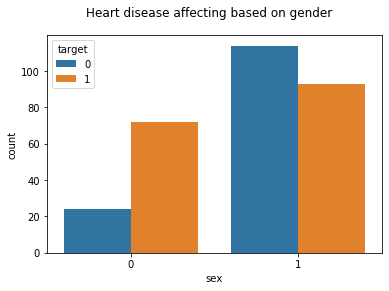

In [218]:
fig = plt.figure()
sns.countplot('sex',hue='target',data=hd)
plt.suptitle('Heart disease affecting based on gender')
plt.show()

The above figure says that the men are more likely to be at risk for heart attack in life than women. 

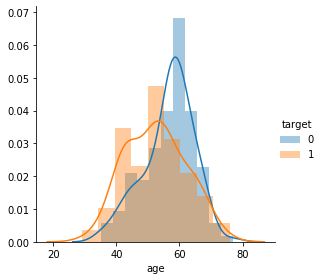

In [219]:
sns.FacetGrid(hd,hue="target",height=4).map(sns.distplot,'age').add_legend()
plt.show()

The above visualization says that people whose age is between 50-60 years are more likely to be at risk for heart attack than others.

Text(0.5, 0, 'Age')

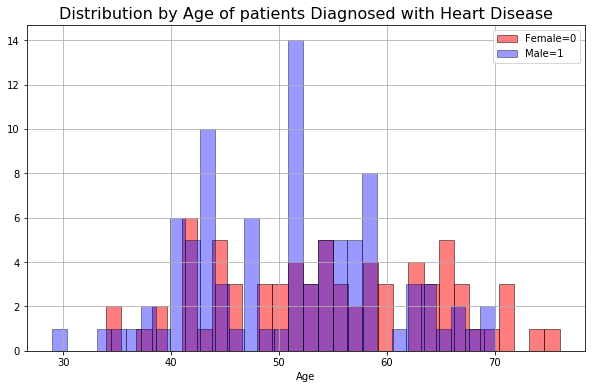

In [220]:
plt.figure(figsize=(10,6))
hd[(hd['sex']==0)&(hd['target']==1)]['age'].hist(alpha=0.5,color='red',bins=30,edgecolor='k',label='Female=0')
hd[(hd['sex']==1)&(hd['target']==1)]['age'].hist(alpha=0.4,color='blue',bins=30,edgecolor='k',label='Male=1')
plt.title('Distribution by Age of patients Diagnosed with Heart Disease',fontsize=16)
plt.legend()
plt.xlabel('Age')

## Model Evaluation 

#### Categorizing the values as X(datapoints) and y(class label) 

In [221]:
X = hd.iloc[:,:-1].values
y = hd.iloc[:,13].values

#### Splitting the dataset into training data and testing data using train_test_split

In [239]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
X_train.shape

(212, 13)

#### Performing standardization for feature scaling

In [240]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### K-NN Classification Model

#### Choosing suitable K-value which gives highest accuracy

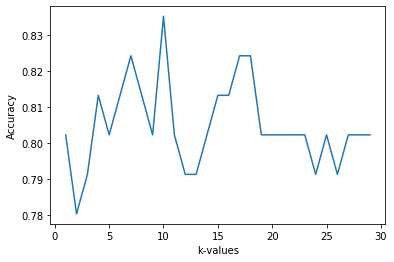

In [241]:
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
for each in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))

plt.plot(range(1,30),score_list)
plt.xlabel("k-values")
plt.ylabel("Accuracy")
plt.show()


#### Fitting Training data to KNN-classification model Using KNeighborsClassifier and predicting the class labels against testing data 

In [242]:
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

#### Predicting the performance of model - confusionmatrix, f1-score, accuracy score

In [243]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        39
           1       0.80      0.94      0.87        52

    accuracy                           0.84        91
   macro avg       0.85      0.82      0.82        91
weighted avg       0.84      0.84      0.83        91



#### Computing Confusion matrix

In [244]:
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[27 12]
 [ 3 49]]


#### Visualising Confusion matrix

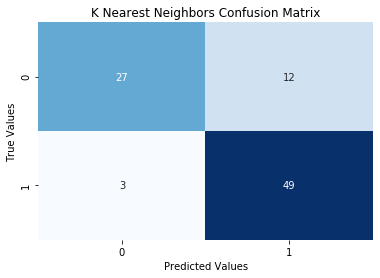

In [245]:
import seaborn as sns
plt.title("K Nearest Neighbors Confusion Matrix")

sns.heatmap(cf_matrix,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()


#### Computing Accuracy of KNN-model

In [246]:
accuracy1=accuracy_score(y_test,y_pred)
print("{0:.2%}".format(accuracy1))

83.52%


### Naive Bayes Model


In [247]:
from sklearn.naive_bayes import GaussianNB
classifier2=GaussianNB()
classifier2.fit(X_train,y_train)
y_pred2 = classifier2.predict(X_test)


In [248]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.64      0.74        39
           1       0.77      0.92      0.84        52

    accuracy                           0.80        91
   macro avg       0.82      0.78      0.79        91
weighted avg       0.81      0.80      0.80        91



#### Visualizing confusion matrix

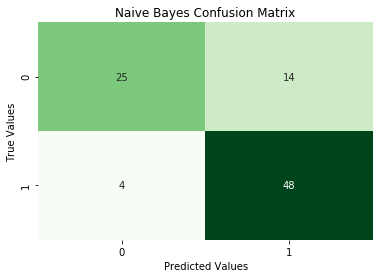

In [249]:
cf_matrix=confusion_matrix(y_test,y_pred2)
plt.title("Naive Bayes Confusion Matrix")

sns.heatmap(cf_matrix,annot=True,cmap="Greens",fmt="d",cbar=False)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

#### Computing Accuracy of Naive Bayes model

In [250]:
accuracy2=accuracy_score(y_test,y_pred2)
print("{0:.2%}".format(accuracy2))

80.22%


### Logistic Regression Model

In [251]:
from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression()
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)

In [252]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        39
           1       0.80      0.94      0.87        52

    accuracy                           0.84        91
   macro avg       0.85      0.82      0.82        91
weighted avg       0.84      0.84      0.83        91



#### Visualizing confusion matrix

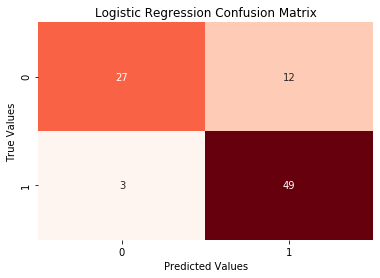

In [253]:
cf_matrix=confusion_matrix(y_test,y_pred3)
plt.title("Logistic Regression Confusion Matrix")

sns.heatmap(cf_matrix,annot=True,cmap="Reds",fmt="d",cbar=False)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

#### Computing accuracy of Logistic Regression Model

In [254]:
accuracy3=accuracy_score(y_test,y_pred3)
print("{0:.2%}".format(accuracy3))

83.52%


In [255]:
accuracy_scores=pd.DataFrame({"Model":["K-NN","NaiveBayes","LogisticRegression"],
                             "Accuracy":[accuracy1*100,accuracy2*100,accuracy3*100]})
accuracy_scores

,Model,Accuracy
0,K-NN,83.516484
1,NaiveBayes,80.219780
2,LogisticRegression,83.516484


## Conclusion:

We can see the three models tested K-nn and Logistic Regression performs best with an accuracy of 83.51%

